In [1]:
excel_file_name = "20230105 - NC3 TDLs.xlsx"

In [2]:
# All necessary library and package imports

# tabular data manipulation ; I see it as excel on steroids
import pandas as pd

# main plotting library
import matplotlib.pyplot as plt

# numerical calculations
import numpy as np

# machine learning library
from sklearn import datasets

# Principal component analysis
from sklearn.decomposition import PCA

# systems library to manipulate folders/files
import sys, warnings

# For the interactive display
from IPython.display import display, Markdown, clear_output

# For the widgets in the interactive display
from ipywidgets import (
    interactive,
    Select,
    Dropdown,
    IntSlider,
    FloatRangeSlider,
    Button,
    VBox,
    HBox,
    Box,
    Tab,
    ToggleButton,
    BoundedIntText,
    Output,
    SelectionRangeSlider,
    Label,
    Text,
)

warnings.simplefilter('ignore')

# to have nice graphs with zoom function in the jupyter notebook
%matplotlib notebook

In [3]:
# for some reason needs to be run twice
%matplotlib notebook

In [4]:
# Add the scripts folder to the python PATH and import my scripts for plotting
sys.path.append("../scripts/")
sys.path.append(".")
from plotter import (
    scatter_plot_color,
    is_datetime,
    create_PCA_figure,
    add_intervals_parity_plot,
    f_save,
    create_widgets_interactive,
)
from reader import (
    read_pi_data_excel,
)

In [5]:
df = read_pi_data_excel(excel_file_name)
df.tail()

,"Pi-tag,Date,DD:MM:YY hh:mm:ss","HS911100.PV,B110 FEED SELECTION FLAG,","HS911200.PV,B120 FEED SELECTION FLAG,","HS911300.PV,B130 FEED SELECTION FLAG,","HS911600.PV,B160 FEED SELECTION FLAG,","HS911700.PV,B170 FEED SELECTION FLAG,","HS911800.PV,B180 FEED SELECTION FLAG,","AU911102A.PV,O2 IN RKGAS B110,VOL %","AU911102T.PV,O2 IN RKGAS B110,VOL %","TI911169.PV,B110 ROOKGS CONV ZONE,C",...,"AU911003AT.PV,O2 IN RKGAS B100 CEL A,VOL %","ZI911912B.PV,OPENING REGIST BOD BR O,%","TI911046.PV,B100-A CONVECTIE,C","AU911004A.PV,O2 IN RKGAS ZNE B B100,VOL %","AU911004AT.PV,O2 IN RKGAS B100 CEL B,VOL %","ZI911912B.PV,OPENING REGIST BOD BR O,%.1","TI911047.PV,B100-B CONVECTIE,C","AI911902A.PV,O2 IN ROOKGAS,VOL %","AI911902T.PV,O2 IN RKGAS B190,VOL %","TI919953.PV,ROOKGAS RADIANT UITL,C"
8852,2023-01-04 20:00:00,NAFTA,NAFTA,"NO FEED (DCP, PSD, TSD, ...)",NAFTA,NAFTA,NAFTA,1.549481,1.915362,1086.327021,...,3.447520,60.150849,1083.987444,1.573391,2.873446,60.150849,1060.631967,1.386574,1.224814,1079.605717
8853,2023-01-04 21:00:00,NAFTA,NAFTA,"NO FEED (DCP, PSD, TSD, ...)",NAFTA,NAFTA,NAFTA,1.483564,1.845859,1079.158359,...,3.498482,60.181301,1083.862253,1.550279,2.858153,60.181301,1058.613100,1.349430,1.207713,1080.701778
8854,2023-01-04 22:00:00,NAFTA,NAFTA,"NO FEED (DCP, PSD, TSD, ...)",NAFTA,NAFTA,NAFTA,1.567704,1.886043,1077.242657,...,3.393728,60.203700,1083.203792,1.597448,2.824423,60.203700,1057.406678,1.339703,1.215194,1080.653068
8855,2023-01-04 23:00:00,NAFTA,NAFTA,"NO FEED (DCP, PSD, TSD, ...)",NAFTA,NAFTA,NAFTA,1.575822,1.882689,1077.476773,...,3.470964,60.303568,1083.049537,1.578470,2.837277,60.303568,1056.229926,1.320501,1.227756,1081.647911
8856,2023-01-05 00:00:00,NAFTA,NAFTA,"NO FEED (DCP, PSD, TSD, ...)",NAFTA,NAFTA,NAFTA,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# just to check if all columns are floats or datetime and no strings are left inside
df.dtypes

Pi-tag,Date,DD:MM:YY hh:mm:ss                 datetime64[ns]
HS911100.PV,B110 FEED SELECTION FLAG,                 object
HS911200.PV,B120 FEED SELECTION FLAG,                 object
HS911300.PV,B130 FEED SELECTION FLAG,                 object
HS911600.PV,B160 FEED SELECTION FLAG,                 object
HS911700.PV,B170 FEED SELECTION FLAG,                 object
HS911800.PV,B180 FEED SELECTION FLAG,                 object
AU911102A.PV,O2 IN RKGAS B110,VOL %                  float64
AU911102T.PV,O2 IN RKGAS B110,VOL %                  float64
TI911169.PV,B110 ROOKGS CONV ZONE,C                  float64
AU911202A.PV,O2 IN RKGAS B120,VOL %                  float64
AU911202T.PV,O2 IN RKGAS B120,VOL %                  float64
TI911269.PV,B120 ROOKGS CONV.ZONE,C                  float64
AU911302A.PV,O2 IN RKGAS B130,VOL %                  float64
AU911302T.PV,O2 IN RKGAS B130,VOL %                  float64
TI911369.PV,B130 ROOKGS CONV ZONE,C                  float64
AU911602A.PV,O2 IN RKGAS

In [7]:
(
    sliders,
    xas_widget,
    yas_widget,
    color_widget,
    plot_button,
    save_button,
    figure_name,
    grid_button,
    add_interval_button,
    marker_size_input,
    figure_title,
    xlim_min_widget,
    xlim_max_widget,
    ylim_min_widget,
    ylim_max_widget,
    tab,
) = create_widgets_interactive(df)

In [8]:
def update_plot(
    df,
    sliders,
    xas_widget,
    yas_widget,
    color_widget,
    grid_button,
    marker_size_input,
    add_interval_button,
    figure_title,
    xlim_min_widget,
    xlim_max_widget,
    ylim_min_widget,
    ylim_max_widget,
):
    global f
    df_copy = df.copy()
    
    for col in sliders:
        minn = sliders[col].value[0]
        maxx = sliders[col].value[1]
        filter_upper = ~(df_copy[col].lt(minn))
        filter_downer = ~(df_copy[col].gt(maxx))
        df_copy = df_copy[filter_upper]
        df_copy = df_copy[filter_downer]
        
    f, ax = plt.subplots()
    plt.ion()
    xas = xas_widget.value
    yas = yas_widget.value
    coloring = color_widget.value
    grid = grid_button.value
    markersize = marker_size_input.value
    add_intervals = add_interval_button.value 
    
    scatter_plot_color(
        f,
        ax,
        df_copy,
        xas,
        yas,
        coloring,
        markersize,
    )
    
    if df[xas].dtype == "float": 
        ax.set(
            xlim=(xlim_min_widget.value, xlim_max_widget.value),    
        )
    
    if df[yas].dtype == "float": 
        ax.set(
            ylim=(ylim_min_widget.value, ylim_max_widget.value),
        )
        
    if figure_title.value != "figure_title":
        ax.set(
            title=figure_title.value,
        )
    
    if add_intervals:
        add_intervals_parity_plot(ax)
    
    ax.grid(grid)

    f.tight_layout()
    
    return f

<IPython.core.display.Javascript object>


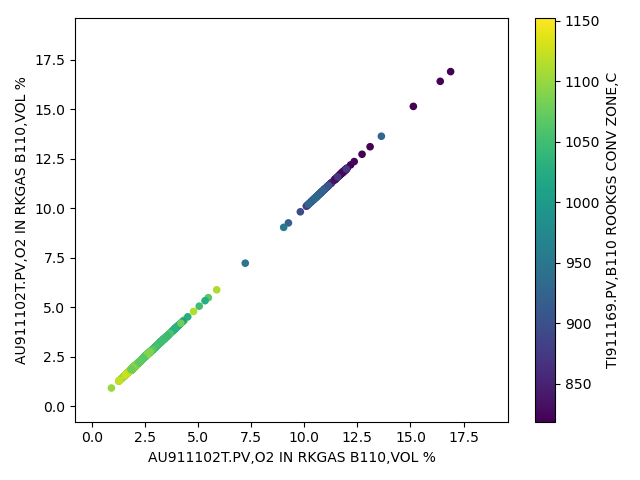

In [9]:
taskbar = VBox(children=[
    tab,
    HBox(children=[plot_button, figure_title,]),
    HBox(children=[save_button, figure_name]),
])

@plot_button.on_click
def plot_on_click(b):
    clear_output()
    display(taskbar)
    update_plot(  
        df,
        sliders,
        xas_widget,
        yas_widget,
        color_widget,
        grid_button,
        marker_size_input,
        add_interval_button,
        figure_title,
        xlim_min_widget,
        xlim_max_widget,
        ylim_min_widget,
        ylim_max_widget,
    )
    
@save_button.on_click
def save_fig(b):
    global f
    f_name = figure_name.value
    f_save(f, f_name)
    
display(taskbar)